# In_Depth: Manifold Learning

to address this deficiency, we can turn to a class of methods known as manifold learn‐ ing—a class of unsupervised estimators that seeks to describe datasets as low- dimensional manifolds embedded in high-dimensional spaces. When you think of a manifold, I’d suggest imagining a sheet of paper: this is a two-dimensional object that lives in our familiar three-dimensional world, and can be bent or rolled in two dimensions. In the parlance of manifold learning, we can think of this sheet as a two- dimensional manifold embedded in three-dimensional space.



In [4]:
%matplotlib inline 
import numpy as np
import seaborn as sns; sns.set()
import matplotlib.pyplot as plt

In [5]:
# kalau di google kita biasakan menggunakan fucntion dan kemudian memanggilnya
def make_hello(N=1000, rseed=42):
        # Make a plot with "HELLO" text; save as PNG
        fig, ax = plt.subplots(figsize=(4, 1))
        fig.subplots_adjust(left=0, right=1, bottom=0, top=1)
        ax.axis('off')
        ax.text(0.5, 0.4, 'HELLO', va='center', ha='center', weight='bold', size=85)
        fig.savefig('hello.png')
        plt.close(fig)
        
        # Open this PNG and draw random points from it
        
        from matplotlib.image import imread 
        data = imread('hello.png')[::-1, :, 0].T 
        rng = np.random.RandomState(rseed)
        X = rng.rand(4 * N, 2)
        i, j = (X * data.shape).astype(int).T 
        mask = (data[i, j] < 1)
        X = X[mask]
        X[:, 0] *= (data.shape[0] / data.shape[1]) 
        X = X[:N]
        return X[np.argsort(X[:, 0])]

    

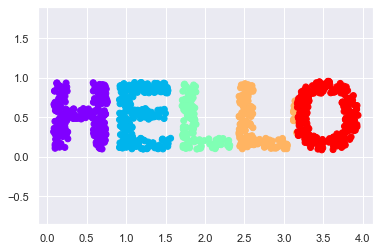

In [6]:
X = make_hello(1000)
colorize = dict(c=X[:, 0], cmap=plt.cm.get_cmap('rainbow', 5))
plt.scatter(X[:, 0], X[:, 1], **colorize)
plt.axis('equal');

# Multidimentional Scalling

jadi manifold learning digunakan untuk rotate and scale, shrink, scale the data

In [7]:
def rotate(X, angle):
    theta = np.deg2rad(angle)
    R = [[np.cos(theta), np.sin(theta)],
         [-np.sin(theta), np.cos(theta)]]
    return np.dot(X, R)


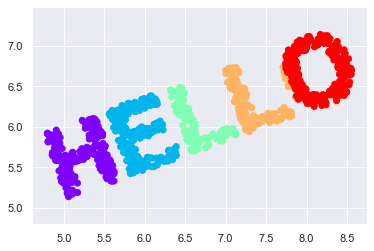

In [8]:
X2 = rotate(X, 20) + 5
plt.scatter(X2[:, 0], X2[:, 1], **colorize)
plt.axis('equal');


from sklearn.metrics import pairwise_

In [9]:
from sklearn.metrics import pairwise_distances
D = pairwise_distances(X)
D.shape

(1000, 1000)

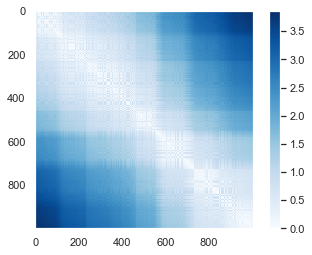

In [10]:
plt.imshow(D, zorder=2, cmap='Blues', interpolation='nearest')
plt.colorbar();

In [14]:
D2 = pairwise_distances(X2)
np.allclose(D, D2)

True

ini apa yang dimaksud? diguakan untuk apa sebenarnya? mencari hubungan?

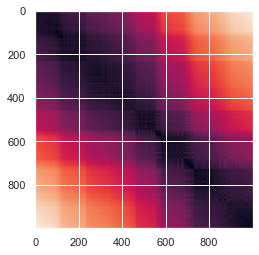

In [11]:
plt.imshow(D, )

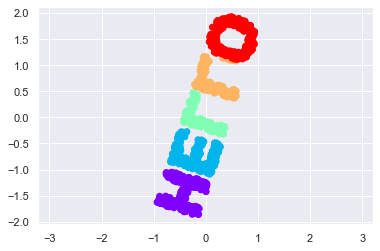

In [12]:
from sklearn.manifold import MDS
model = MDS(n_components=2, dissimilarity='precomputed', random_state=1)
out = model.fit_transform(D)
plt.scatter(out[:, 0], out[:, 1], **colorize)
plt.axis('equal'); # akhir dari plt,, apakah harus seperti ini?


# MDS as Manifold Learning

jadi ini sangat berguna karena semua matrix dapat dilakukan rotasi dan sebagaiannya, apa yang kita inginkan, itu menarik sekali. kalau kita menginginkan seperti itu, harusnya itu bisa digunakan utnuk bentuk yang lain, gambar atau picture itu dalam bentuk matrix nantinya. jadi kalau kita gunakan metode ini untuk mengolah. mari kita ekstrasksi modelnya. untuk apa saja metode ini? 


selanjutnya kita akan memprojectsikan menjadi 3 dimensi, menarik sekali , bagaimanana cara membuat ini?



In [16]:
def random_projection(X, dimension=2, rseed=42):
    assert dimension >= X.shape[1]
    rng = np.random.RandomState(rseed)
    C = rng.randn(dimension, dimension)
    e, V = np.linalg.eigh(np.dot(C, C.T))
    return np.dot(X, V[:X.shape[1]])

X3 = random_projection(X, 3)
X3.shape

(1000, 3)

mari kita viasualisaasikan apa yang telah kita olah sebelumnya. 


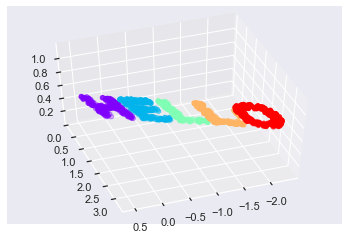

In [19]:
from mpl_toolkits import mplot3d
ax = plt.axes(projection='3d')
ax.scatter3D(X3[:, 0], X3[:, 1], X3[:, 2],
             **colorize)
ax.view_init(azim=70, elev=50)

kita rotasi sesuai apa yang kita mau coba kita modifikasi sedikit

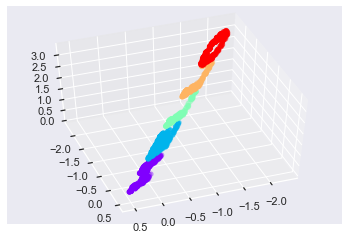

In [36]:
ax = plt.axes(projection='3d')
ax.scatter3D(X3[:, 0], X3[:, 0], X3[:, 1],
             **colorize)
ax.view_init(azim=70, elev=50)

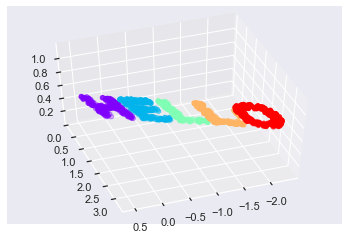

In [37]:
ax = plt.axes(projection='3d')
ax.scatter3D(X3[:, 0], X3[:, 1], X3[:, 2],
             **colorize)
ax.view_init(azim=70, elev=50)

sebenernya kalau pakai plotly jadi lebih bagus, sayang saja belum terinstall disini, jadi tidak terlalu menarik jadinya


### Note: 
kita dapat menggunakna MDS estimator kepada input this three-dimensional data, compute the distance matrix dan selajutnya menenputikan optimal two dimensional embedding for this distace matrix, hasilnya kan merecover sebuah represesntatif dari data awal!

ini merupakan gambaran normal dari appa yang kita sebut default, jadi kita mingin memodifikasi sesuati apa yang ada di buku, menjadi menarik sekali bukan?


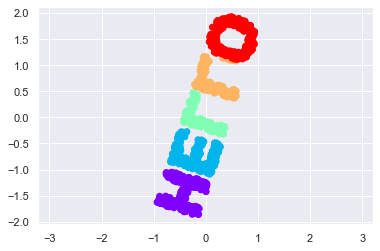

In [39]:
# create model MDS nya 
model = MDS(n_components=2,
    random_state=1)
out3 = model.fit_transform(X3)
plt.scatter(out3[:, 0], out3[:, 1], **colorize)
plt.axis('equal');

mengapa jadi gambarnya tidak bagus? apakah sebuah data yang kita lakukan diatas reproducible atau tidak, atau dia menyimpan memory, nah benar, disini python dia menyimpan memory instrucsi sebelumnya

### Note: 
sekarang sudah jadi bagus, jadi kalau bisa kita guankan seperti ini. 


### explain: 
MDS embeddign of the three-dimensial data recovers the input up to a rotation and reflection

katanya iini adalah goal dari sebuah manifold learning 
sebenernya ini belum tau maksudnya apa, apakah mengguakan ini ataukah mengguakan itu, dan ini diguakan untuk apa sebenarnya?

# Nonlinear Embeddings: Where MDS Fails 

mugnkin maksudnya adalah, kita tidak hanya ingin merotasi dan refleksi saja dari data tersebut, mungkin kita bisa mengolahnya menajdi bentuk yang lain. atau bisa dala shape tertentu, mugkin itu yang disebut tidak linear, 

benar sekali, ini kita akan embedding dalam bentuk S-shape

In [41]:
def make_hello_s_curve(X):
    t = (X[:, 0] - 2) * 0.75 * np.pi
    x = np.sin(t)
    y = X[:, 1]
    z = np.sign(t) * (np.cos(t) - 1)
    return np.vstack((x, y, z)).T

XS = make_hello_s_curve(X)

In [42]:
XS

array([[ 0.98059953,  0.31577315,  1.19602185],
       [ 0.9789222 ,  0.66378969,  1.20423353],
       [ 0.97834053,  0.32361022,  1.20700197],
       ...,
       [-0.98420695,  0.64950893, -1.17702169],
       [-0.98443912,  0.3816165 , -1.17572598],
       [-0.98921407,  0.52569018, -1.14647707]])

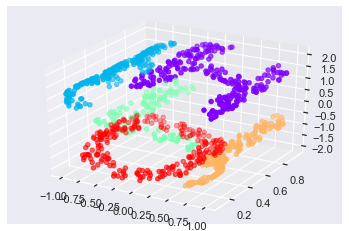

In [44]:
# plot this fucking curve using S-shape
from mpl_toolkits import mplot3d
ax = plt.axes(projection='3d')
ax.scatter3D(XS[:, 0], XS[:, 1], XS[:, 2], **colorize);

hubungan dari setiap data diatas masih ada, jadi tidak merubah hubungannya. hanya di rotate atau di embbedding, mengugnakna manifold learning. nah sekang yagn kita butuhkan adalah mengugakna itu untuk mebmuat sebuah project. nah sekarng waktunya istirahat sebentar. 